In [1]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

time: 0 ns (started: 2023-05-22 02:29:32 +07:00)


In [2]:
train_ds = pd.read_csv("./train_ds_small_process.csv")
test_ds = pd.read_csv("./test_ds_small_process.csv")

time: 32 ms (started: 2023-05-22 02:29:33 +07:00)


In [3]:
X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]


time: 0 ns (started: 2023-05-22 02:29:33 +07:00)


In [4]:
from sklearn import metrics


time: 188 ms (started: 2023-05-22 02:29:33 +07:00)


In [5]:
def metric_for_evalue_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"R2 = {r2}")
    print(f"RMSE = {rmse}")

time: 0 ns (started: 2023-05-22 02:29:33 +07:00)


In [6]:
def plot_residuals(y_test, y_pred):
    indexes = list(range(1, 150+1))[:150]
    fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
    axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
    axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
    axs.legend()
    axs.set_ylabel('Price')
    fig.suptitle('Predicted Price VS Actual Price')
    plt.show()

time: 0 ns (started: 2023-05-22 02:29:33 +07:00)


Random Forest Regressor


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

RandomForestRegressor()

MAE = 7302469.351988795
MSE = 160364452932214.28
R2 = 0.1720398232349737
RMSE = 12663508.71331537
time: 468 ms (started: 2023-05-22 02:29:33 +07:00)


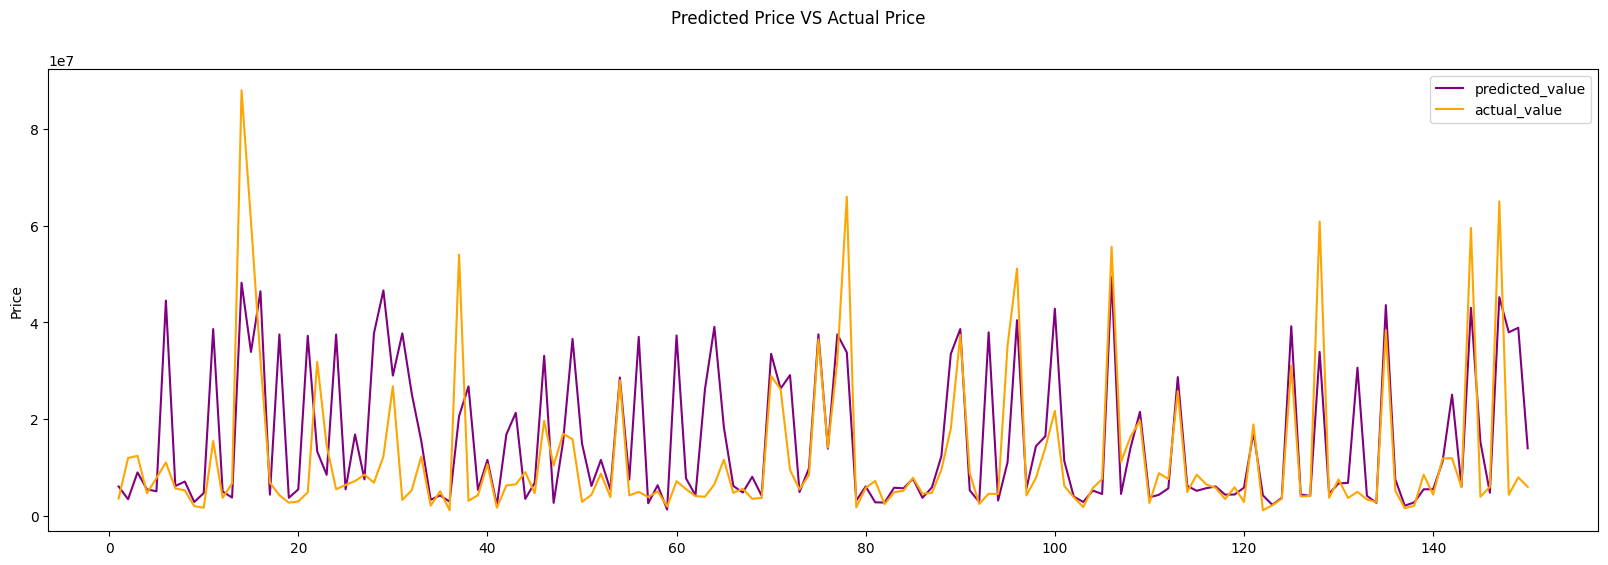

time: 312 ms (started: 2023-05-22 02:29:34 +07:00)


In [8]:
plot_residuals(y_test, y_pred)

In [9]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_pars = grid_search.best_params_

print('Best hyperparameters: ', best_pars)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
time: 1min 3s (started: 2023-05-22 02:29:34 +07:00)


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=0)

MAE = 7112065.866781045
MSE = 144459984438532.8
R2 = 0.254154445924757
RMSE = 12019150.736991895


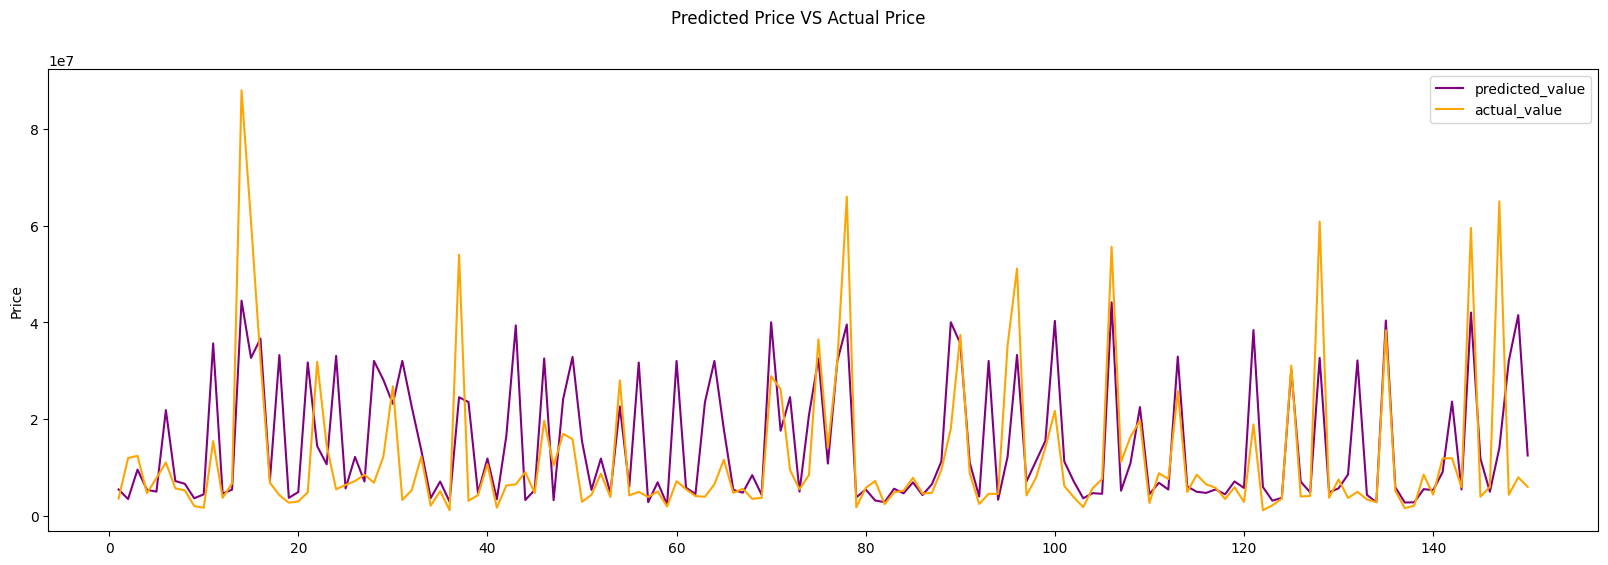

time: 516 ms (started: 2023-05-22 02:30:37 +07:00)


In [10]:
rf = RandomForestRegressor(random_state=0, max_depth=best_pars['max_depth'], min_samples_split=best_pars[
                           'min_samples_split'], min_samples_leaf=best_pars['min_samples_leaf'], max_features=best_pars['max_features'])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

Logistic Regression

LogisticRegression()

MAE = 5810946.75
MSE = 133382984781737.5
R2 = 0.3113448919754356
RMSE = 11549155.154457727


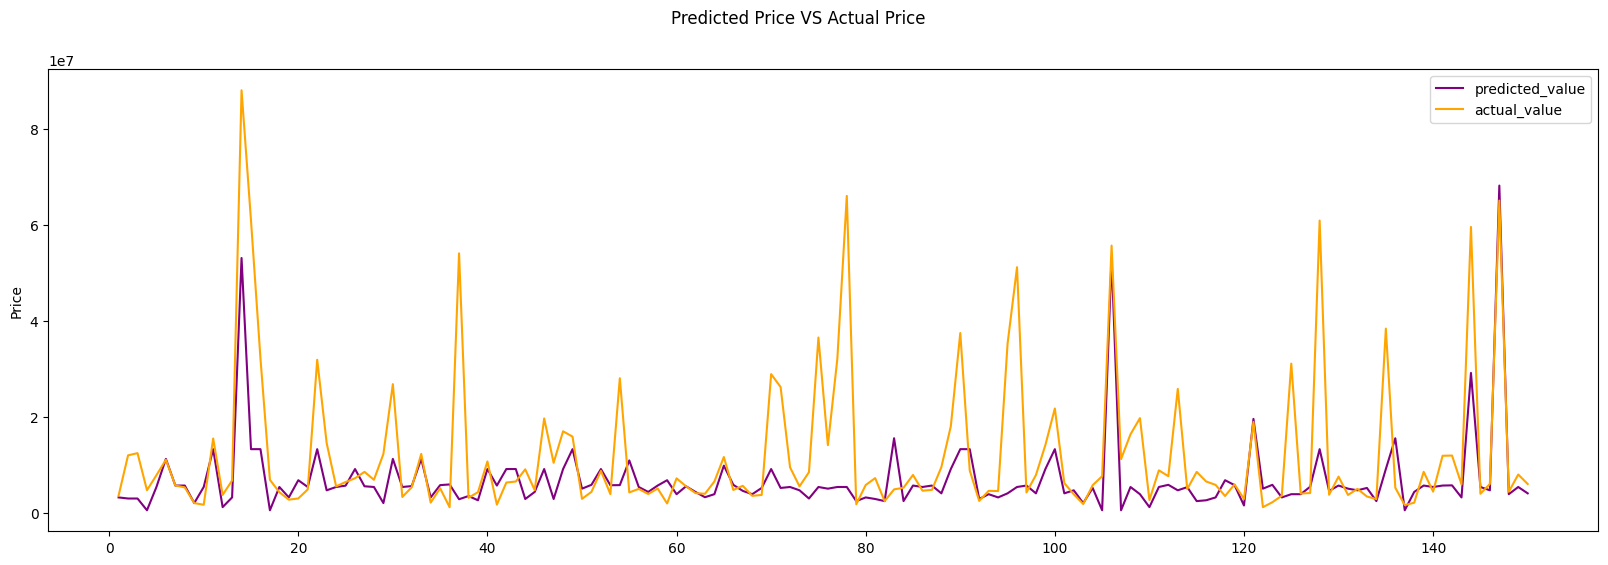

time: 1.08 s (started: 2023-05-22 02:30:38 +07:00)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

In [12]:
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)

# clf.best_params_

c = 0.01
penalty = 'none'

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none']})

time: 32.6 s (started: 2023-05-22 02:30:39 +07:00)


LogisticRegression(C=0.01, penalty='none')

MAE = 6025881.75
MSE = 125947879635737.5
R2 = 0.3497322705895156
RMSE = 11222650.294637961


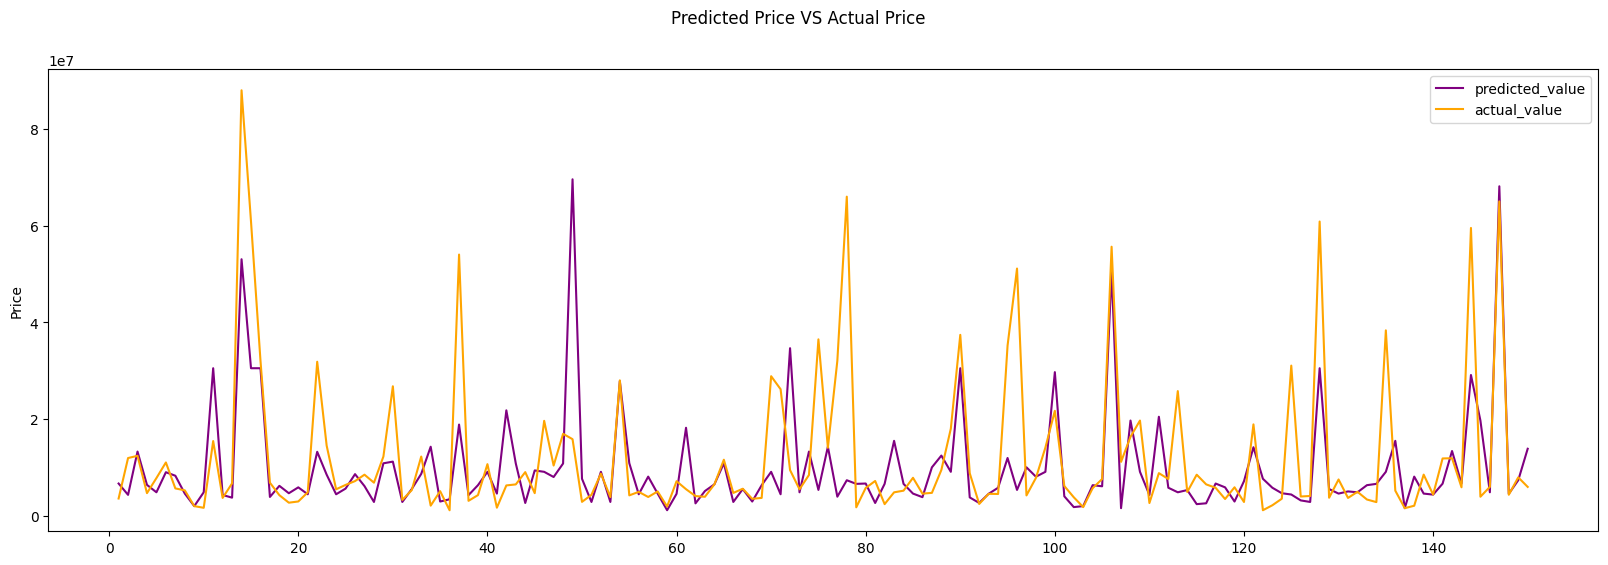

time: 1.33 s (started: 2023-05-22 02:31:12 +07:00)


In [13]:
logistic = LogisticRegression(penalty='none',C=0.01)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)